# Análise OD-2023
## Overview
As seguintes análises foram feitas:
- Análise comparativa dos meios de transporte da OD 23 (quais os meios mais/menos utilizados) 
- Caracterização do Perfil do Pedestre - perfil demográfico
  - Distribuição por sexo
  - Distribuição por idade
  - Distribuição por grau de instrução
  - Distribuição por condição de atividade
  - Distribuição por renda
  - Relação entre renda e grau de instrução

### TODO
- Comparar região metropolitana e municipal
- Comparar OD-17 vs OD-23
- Lembrar do novo campo RAÇA

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.models import meios_transporte, criterio_br

In [29]:
data_path = "../data/OD/OD-2023/od23_all.csv"
df = pd.read_csv(data_path)
# df.columns

In [30]:
df.head()

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,TIPVG,TP_ESAUTO,VL_EST,PE_BICI,TP_ESTBICI,PROP_BICI,DISTANCIA,ID_ORDEM,HORA_SAIDA,HORA_CHEG
0,1,36,-23.550855,-46.629023,0,1,32.34,1,1,17/04/2024,...,4,0,0,7,2,1,1518.600013,1,11:00:00,11:30:00
1,1,36,-23.550855,-46.629023,100001,0,32.34,1,1,17/04/2024,...,4,0,0,9,2,1,1518.600013,2,15:30:00,16:00:00
2,1,36,-23.550855,-46.629023,100002,1,32.34,2,1,17/04/2024,...,2,0,0,0,0,0,8350.069281,3,18:00:00,18:30:00
3,1,36,-23.550855,-46.629023,100002,0,32.34,2,1,17/04/2024,...,2,0,0,0,0,0,8350.069281,4,23:00:00,23:25:00
4,1,36,-23.550855,-46.629023,100002,0,32.34,2,1,17/04/2024,...,2,0,0,0,0,0,10346.375791,5,13:00:00,13:30:00


## Comparação dos meios de transporte (OD-2023)

Colunas importantes:
- FE_VIA: fator de viagem
- MODOPRIN: modo principal de viagem da pessoa

In [31]:
print(meios_transporte)

{1: 'Metrô', 2: 'Trem', 3: 'Monotrilho', 4: 'Ônibus/micro-ônibus/van do município de São Paulo', 5: 'Ônibus/micro-ônibus/van de outros municípios', 6: 'Ônibus/micro-ônibus/van metropolitano', 7: 'Transporte Fretado', 8: 'Transporte Escolar', 9: 'Dirigindo Automóvel', 10: 'Passageiro de Automóvel', 11: 'Táxi Convencional', 12: 'Táxi não Convencional / aplicativo', 13: 'Dirigindo Moto', 14: 'Passageiro de Moto', 15: 'Passageiro de Mototáxi', 16: 'Bicicleta', 17: 'A Pé', 18: 'Outros'}


In [32]:
meios_fatorexp = df.groupby('MODOPRIN')['FE_VIA'].sum()
meios_fatorexp = meios_fatorexp.sort_values()

In [33]:
meios_fatorexp.index = meios_fatorexp.index.map(lambda x: meios_transporte.get(x, "Desconhecido"))

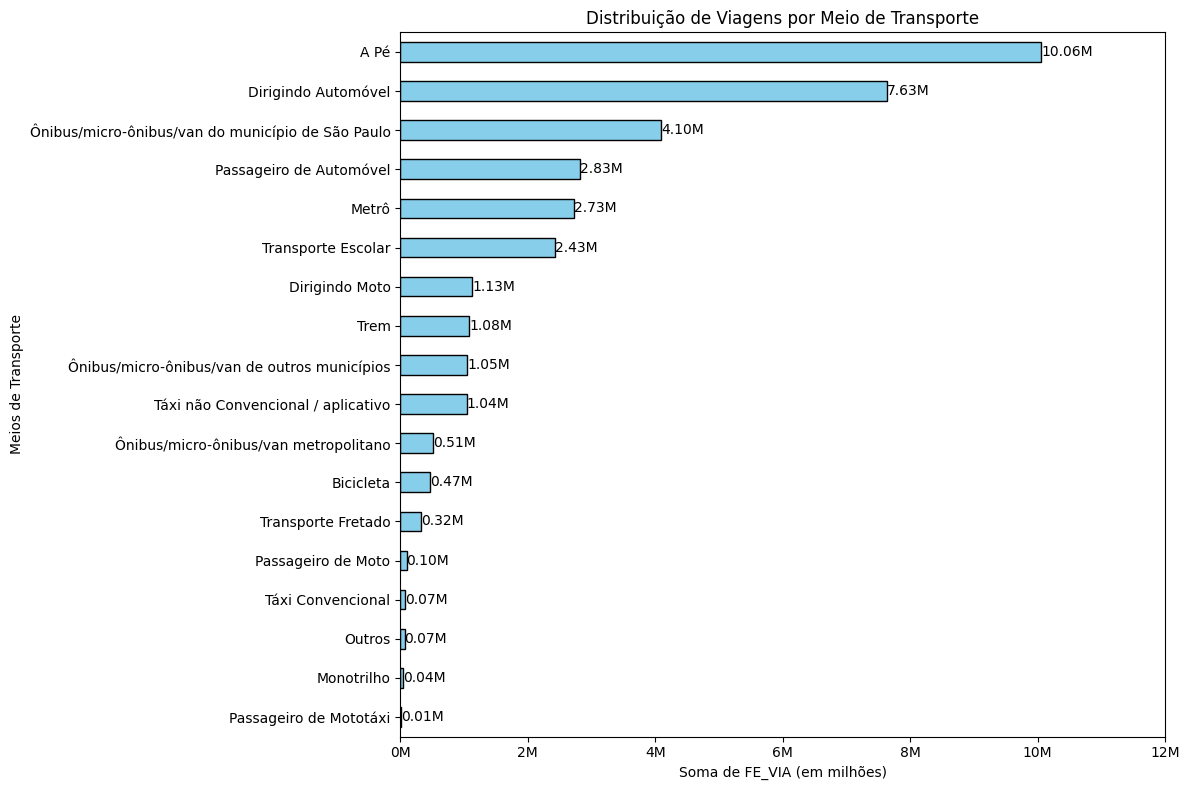

In [34]:
plt.figure(figsize=(12, 8))
meios_fatorexp.plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Soma de FE_VIA (em milhões)')
plt.ylabel('Meios de Transporte')
plt.title('Distribuição de Viagens por Meio de Transporte')

for index, value in enumerate(meios_fatorexp):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center')  

plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x/1e6)}M' for x in plt.xticks()[0]])

plt.tight_layout()  
plt.show()

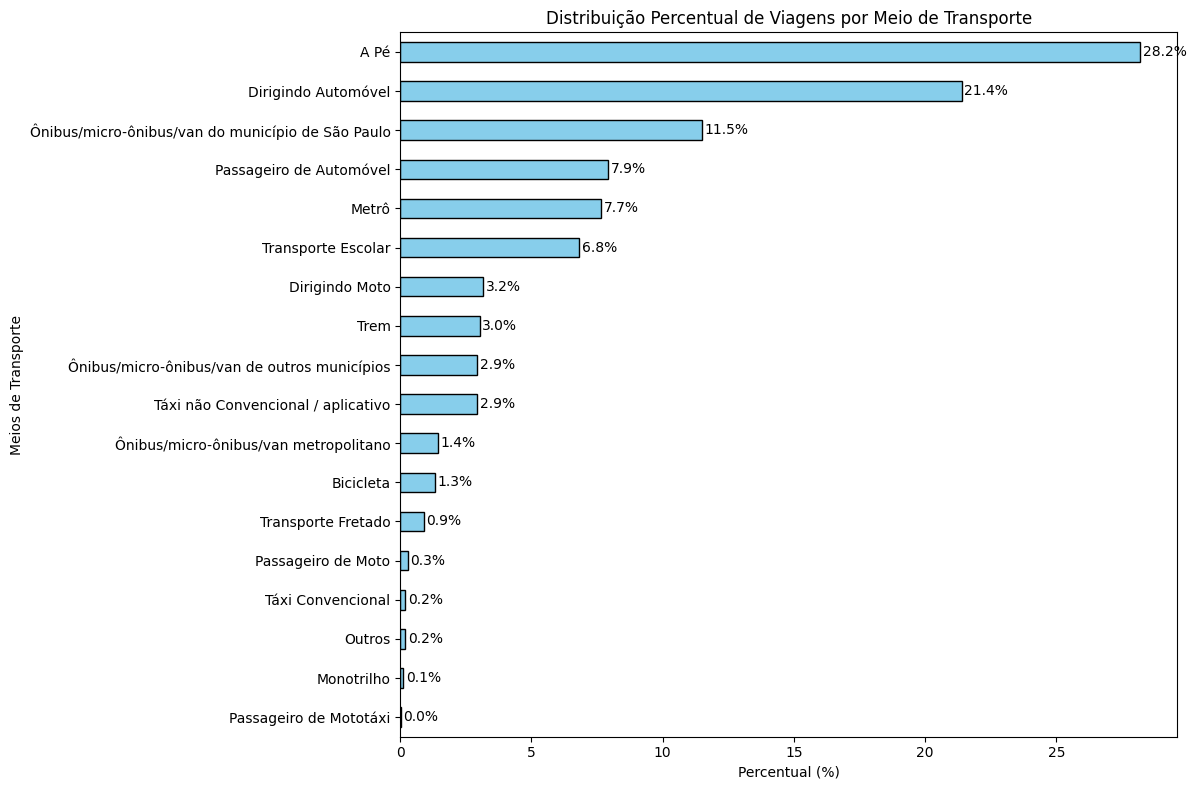

In [35]:
meios_fatorexp_normalizado = (meios_fatorexp / meios_fatorexp.sum()) * 100

plt.figure(figsize=(12, 8))
meios_fatorexp_normalizado.plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Percentual (%)')
plt.ylabel('Meios de Transporte')
plt.title('Distribuição Percentual de Viagens por Meio de Transporte')

for index, value in enumerate(meios_fatorexp_normalizado):
    plt.text(value + 0.1, index, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()

### Análise comparativa percentual entre os meios de transporte

Com os gráficos acima, observa-se que os meios de transporte mais utilizados são, em ordem decrescente: a pé, dirigindo automóvel, e ônibus(e derivados) do município de São Paulo.

- A pé - 27.7%
- Dirigindo automóvel - 21.0% 
- Ônibus(e derivados) do município de São Paulo - 10.7%

## Caracterização do Perfil do Pedestre

Colunas importantes:
- FE_PESS: fator expansão da pessoa ('peso da linha')
- MODOPRIN: modo principal

01: Metrô, 02: Trem, 03:Monotrilho, 04: Ônibus/micro-ônibus/van do município de São Paulo, 05: Ônibus/micro-ônibus/van de outros municípios, 06: Ônibus/micro-ônibus/van metropolitano, 07: Transporte Fretado, 08: Transporte Escolar, 09: Dirigindo Automóvel, 10: Passageiro de Automóvel, 11: Táxi Convencional, 12: Táxi não Convencional / aplicativo, 13: Dirigindo Moto, 14: Passageiro de Moto, 15: Passageiro de Mototáxi, 16: Bicicleta, 17: A Pé, 18: Outros

- IDADE
- SEXO

1: Masculino, 2: Feminino, 3: Não respondeu


- ESTUDA: estuda atualmente

1: Não, 2: Creche/Pré-Escola, 3: 1º Grau /Fundamental, 4: 2º Grau/Médio, 5: Superior/Universitário, 6: Outros

- GRAU_INS: grau de instrução

1: Não Alfabetizado/Fundamental I Incompleto, 2: Fundamental I Completo/Fundamental II Incompleto, 3: Fundamental II Completo/Médio Incompleto, 4: Médio Completo/Superior Incompleto, 5: Superior Completo

- CD_ATIVI: condição atividade (trabalho regular, bico...)

1: Tem trabalho regular, 2: Faz bico, 3: Em Licença Médica, 4: Aposentado/Pensionista, 5: Sem Trabalho, 6: Nunca Trabalhou, 7: Dona de Casa, 8: Estudante

- VL_REN_I: valor da renda individual

- MOTIVO_D: motivo no destino

1: Trabalho Indústria, 2: Trabalho Comércio, 3: Trabalho Serviços, 4: Escola/Educação, 5: Compras, 6: Médico/Dentista/Saúde, 7: Recreação/Visitas/Lazer, 8: Residência, 9: Procurar Emprego, 10: Assuntos Pessoais, 11: Refeição

- PE_BICI: por que viajou a pé ou bicicleta

1: Pequena distância, 2: Condução cara, 3: Ponto/Estação distante, 4: Condução demora para passar, 5: Viagem demorada, 6: Condução lotada, 7: Atividade física, 8: Medo de contágio, 9: Outros motivos

- DISTANCIA: distância da viagem em metros

- CRITERIOBR: Critério de Classificação Econômica Brasil

1: A, 2: B1, 3: B2, 4: C1, 5: C2, 6: D e E

- RACA: raça

1: Branca, 2: Preta, 3: Amarela, 4: Parda, 5: Indígena, 6: Sem declaração

Correlação entre variáveis

In [36]:
df[['IDADE', 'VL_REN_I', 'DISTANCIA', 'FE_VIA']].corr(method='pearson')

,IDADE,VL_REN_I,DISTANCIA,FE_VIA
IDADE,1.000000,0.319188,0.114859,-0.188072
VL_REN_I,0.319188,1.000000,0.073739,-0.149652
DISTANCIA,0.114859,0.073739,1.000000,0.036356
FE_VIA,-0.188072,-0.149652,0.036356,1.000000


In [37]:
df[['IDADE', 'VL_REN_I', 'DISTANCIA', 'FE_VIA']].corr(method='spearman')

,IDADE,VL_REN_I,DISTANCIA,FE_VIA
IDADE,1.000000,0.631517,0.189024,-0.206731
VL_REN_I,0.631517,1.000000,0.301261,-0.199956
DISTANCIA,0.189024,0.301261,1.000000,-0.012745
FE_VIA,-0.206731,-0.199956,-0.012745,1.000000


Tabelas de contingência entre sexo e modo de transporte

In [38]:
pd.crosstab(df['SEXO'], df['MODOPRIN'], normalize='index')

MODOPRIN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
SEXO,,,,,,,,,,,,,,,,,,
1,0.077989,0.022077,0.000677,0.091014,0.017212,0.028313,0.008374,0.052242,0.305686,0.056501,0.00310,0.025818,0.048821,0.001800,0.000125,0.014361,0.243091,0.002797
2,0.087897,0.021851,0.000758,0.129555,0.026926,0.039790,0.004775,0.052689,0.186985,0.095087,0.00548,0.048848,0.004846,0.003084,0.000300,0.002890,0.287341,0.000899
3,0.047619,0.000000,0.000000,0.142857,0.000000,0.023810,0.000000,0.190476,0.095238,0.000000,0.00000,0.190476,0.000000,0.000000,0.000000,0.000000,0.309524,0.000000


Filtrando apenas viagens a pé

In [39]:
# Filtrando pedestres
pedestrians = df.query('MODOPRIN == 17')

### Pré-processamento dos Dados
Criação de categorias: Faixas etárias e Distâncias percorridas

Categorização do Criterio BR e Sexo

In [40]:
# Categorização da distância (em metros)
bins_distancia = [0, 500, 1000, 2000, 5000, float('inf')]
labels_distancia = ['Muito curta (<500m)', 'Curta (500-1000m)', 'Média (1001-2000m)', 
                   'Longa (2001-5000m)', 'Muito longa (>5000m)']

pedestrians['CAT_DISTANCIA'] = pd.cut(pedestrians['DISTANCIA'], bins=bins_distancia, labels=labels_distancia)

/tmp/ipykernel_8973/2982681104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrians['CAT_DISTANCIA'] = pd.cut(pedestrians['DISTANCIA'], bins=bins_distancia, labels=labels_distancia)


In [41]:
# Categorização de idade
bins_idade = [0, 12, 18, 30, 50, 65, 120]
labels_idade = ['Criança (0-12)', 'Adolescente (13-18)', 'Jovem (19-30)', 
               'Adulto (31-50)', 'Adulto 50+ (51-65)', 'Idoso (65+)']

pedestrians['CAT_IDADE'] = pd.cut(pedestrians['IDADE'], bins=bins_idade, labels=labels_idade)

/tmp/ipykernel_8973/471568845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrians['CAT_IDADE'] = pd.cut(pedestrians['IDADE'], bins=bins_idade, labels=labels_idade)


In [42]:
# Mapeamento dos critérios econômicos
pedestrians['CLASSE_ECON'] = pedestrians['CRITERIOBR'].map(criterio_br)
pedestrians['CLASSE_ECON'].value_counts()

/tmp/ipykernel_8973/1527876984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrians['CLASSE_ECON'] = pedestrians['CRITERIOBR'].map(criterio_br)


CLASSE_ECON
C2     9228
C1     8340
B2     6452
D-E    2433
B1     2243
A      1266
Name: count, dtype: int64

In [43]:
# Mapeamento do sexo
sexo_labels = {1: 'Masculino', 2: 'Feminino'}
pedestrians['SEXO_LABEL'] = pedestrians['SEXO'].map(sexo_labels)

/tmp/ipykernel_8973/2383366727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrians['SEXO_LABEL'] = pedestrians['SEXO'].map(sexo_labels)


In [56]:
# Mapeamento da raça
raca_labels = {1:"Branca", 2:"Preta", 3:"Amarela", 4:"Parda", 5:"Indígena", 6:"Sem declaração"}
pedestrians['RACA_LABEL'] = pedestrians['RAÇA'].map(raca_labels)

/tmp/ipykernel_8973/2202495209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrians['RACA_LABEL'] = pedestrians['RAÇA'].map(raca_labels)


Peso (FE_PESS) total de pedestres

In [44]:
pedestrians_weight = pedestrians['FE_VIA'].sum()

### Análise Descritiva Básica
**Perfil demográfico**
- Distribuição por sexo (SEXO)
- Distribuição por idade (IDADE)
- Distribuição por raça (RAÇA)
- Distribuição por grau de instrução (GRAU_INS)

**Características socioeconômicas**
- Distribuição por condição de atividade (CD_ATIVI)
- Distribuição de renda (VL_REN_I)
- Relação entre renda e modo pedestre

In [58]:
sexo_dist = pedestrians.groupby('SEXO_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por sexo (%):\n", sexo_dist.round(2))

Distribuição por sexo (%):
 SEXO_LABEL
Feminino     56.02
Masculino    43.92
Name: FE_VIA, dtype: float64


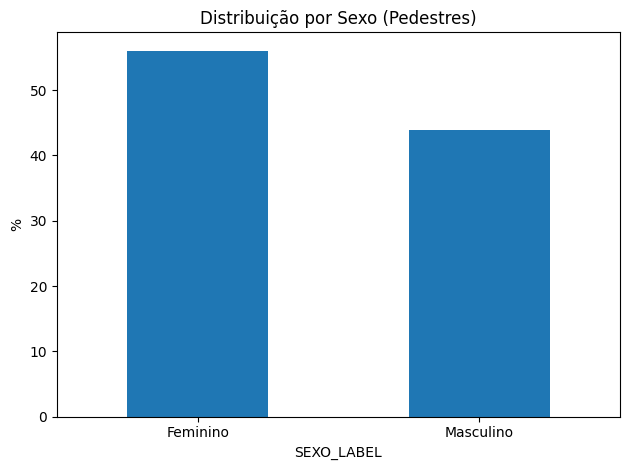

In [46]:
sexo_dist_normalized = sexo_dist / sexo_dist.sum() * 100
sexo_dist_normalized.plot(kind='bar', title='Distribuição por Sexo (Pedestres)', ylabel='%')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
idade_stats = pedestrians['IDADE'].describe()
print("\nEstatísticas de idade (pedestres):\n", idade_stats.round(2))


Estatísticas de idade (pedestres):
 count    29962.00
mean        32.57
std         20.04
min          1.00
25%         15.00
50%         31.00
75%         48.00
max         95.00
Name: IDADE, dtype: float64


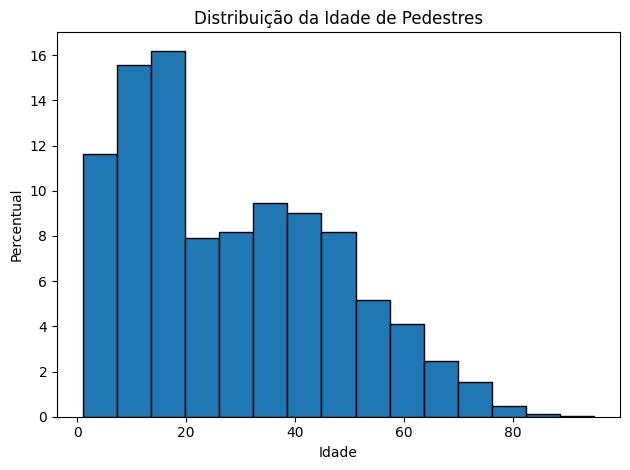

In [49]:
plt.hist(
    pedestrians['IDADE'],
    bins=15,
    weights=pedestrians['FE_VIA'] / pedestrians_weight * 100,
    edgecolor='black'
)

plt.title('Distribuição da Idade de Pedestres')
plt.xlabel('Idade')
plt.ylabel('Percentual')
plt.tight_layout()
plt.show()

In [64]:
raca_dist = pedestrians.groupby('RACA_LABEL')['FE_VIA'].sum() / pedestrians_weight * 100
print("Distribuição por raça (%):\n", raca_dist.round(2))

Distribuição por raça (%):
 RACA_LABEL
Amarela            1.21
Branca            49.01
Indígena           0.29
Parda             38.96
Preta             10.03
Sem declaração     0.50
Name: FE_VIA, dtype: float64


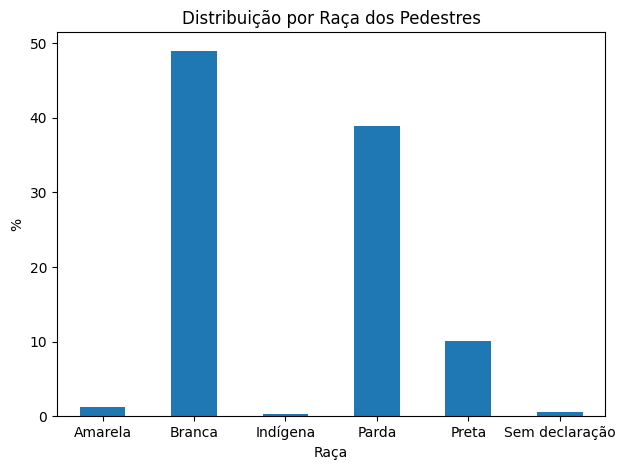

In [66]:
raca_dist_normalized = raca_dist / raca_dist.sum() * 100
raca_dist_normalized.plot(kind='bar', title='Distribuição por Raça dos Pedestres', ylabel='%', xlabel="Raça")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_8973/751835663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrians['GRAU_LABEL'] = pedestrians['GRAU_INS'].map(grau_labels)


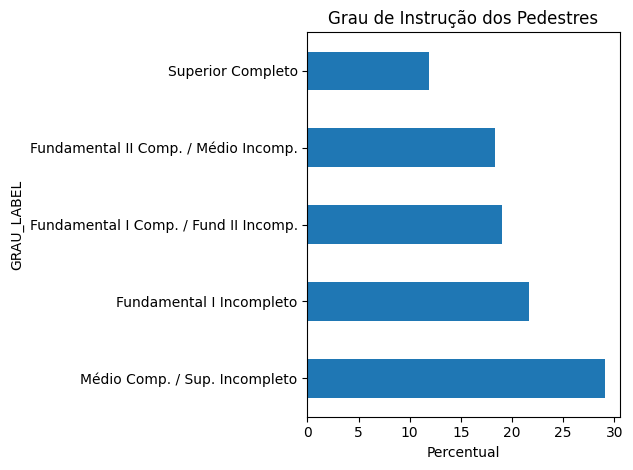

In [50]:
grau_labels = {
    1: 'Fundamental I Incompleto',
    2: 'Fundamental I Comp. / Fund II Incomp.',
    3: 'Fundamental II Comp. / Médio Incomp.',
    4: 'Médio Comp. / Sup. Incompleto',
    5: 'Superior Completo'
}
pedestrians['GRAU_LABEL'] = pedestrians['GRAU_INS'].map(grau_labels)

grau_dist = pedestrians.groupby('GRAU_LABEL')['FE_VIA'].sum()

grau_dist_normalized = grau_dist / grau_dist.sum() * 100

grau_dist_normalized = grau_dist_normalized.sort_values(ascending=False)

grau_dist_normalized.plot(kind='barh', title='Grau de Instrução dos Pedestres', xlabel='Percentual')
plt.tight_layout()
plt.show()


/tmp/ipykernel_8973/2436724632.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrians['ATIVI_LABEL'] = pedestrians['CD_ATIVI'].map(atividade_labels)


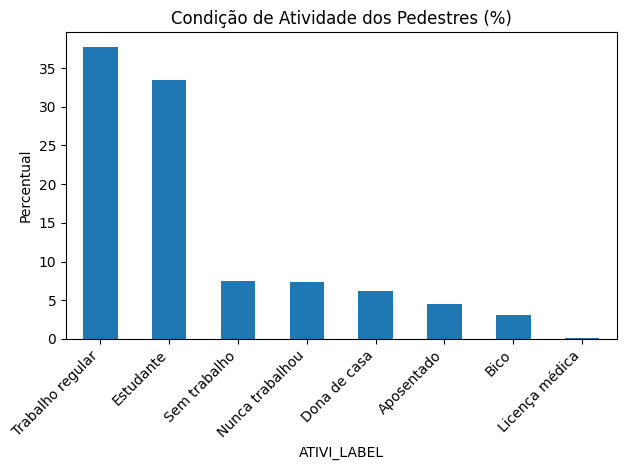

In [51]:
atividade_labels = {
    1: 'Trabalho regular',
    2: 'Bico',
    3: 'Licença médica',
    4: 'Aposentado',
    5: 'Sem trabalho',
    6: 'Nunca trabalhou',
    7: 'Dona de casa',
    8: 'Estudante'
}
pedestrians['ATIVI_LABEL'] = pedestrians['CD_ATIVI'].map(atividade_labels)

ativi_dist = pedestrians.groupby('ATIVI_LABEL')['FE_VIA'].sum()

ativi_dist_normalized = ativi_dist / ativi_dist.sum() * 100

ativi_dist_normalized = ativi_dist_normalized.sort_values(ascending=False)

ativi_dist_normalized.plot(kind='bar', title='Condição de Atividade dos Pedestres (%)', ylabel='Percentual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [52]:
renda_stats = pedestrians['VL_REN_I'].describe()
print("\nEstatísticas da renda individual (pedestres):\n", renda_stats)


Estatísticas da renda individual (pedestres):
 count    21733.000000
mean      1643.542447
std       3934.722426
min          0.000000
25%          0.000000
50%          0.000000
75%       1900.000000
max      90000.000000
Name: VL_REN_I, dtype: float64


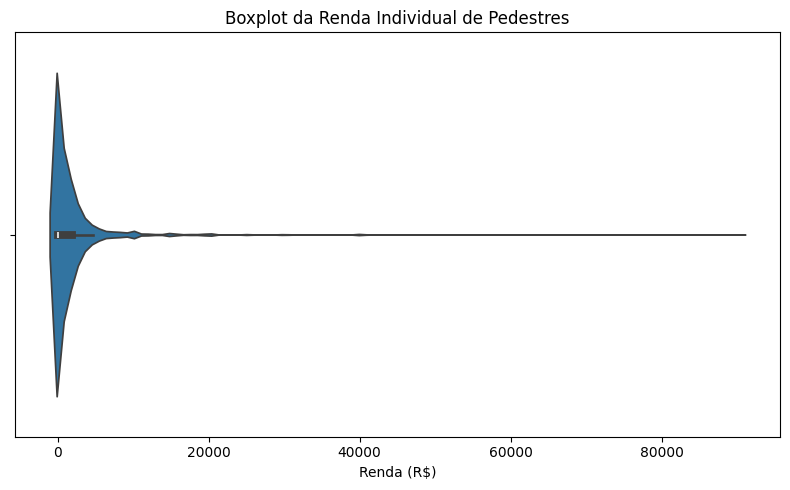

In [53]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=pedestrians, x='VL_REN_I')
plt.title('Boxplot da Renda Individual de Pedestres')
plt.xlabel('Renda (R$)')
plt.tight_layout()
plt.show()

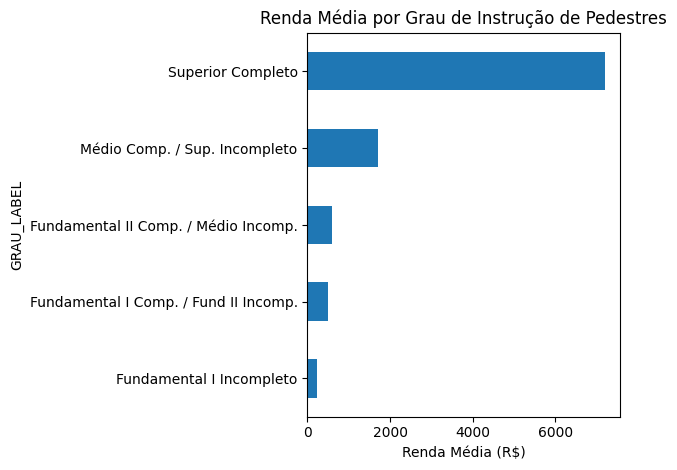

In [54]:
renda_grau = pedestrians.groupby('GRAU_LABEL')['VL_REN_I'].mean().sort_values()
renda_grau.plot(kind='barh', title='Renda Média por Grau de Instrução de Pedestres', xlabel='Renda Média (R$)')
plt.tight_layout()
plt.show()

### Análise Específica do Comportamento como Pedestre
**Motivações**
- Razões para caminhar (PE_BICI)
- Motivos de viagem (MOTIVO_D)

**Padrões de deslocamento**
- Distribuição de distâncias percorridas (DISTANCIA)
- Relação entre distância e motivo da viagem
- Relação entre distância e características demográficas